# CLUB algorithm draft - Online Clustering of Bandits

Antoine GRELETY

Vincent LE MEUR

In [14]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
%load_ext autoreload
%autoreload 2
import online_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
n_user=80
T=5000
D=5
c=5
Online =online_cluster.OLCB(T=T,n_user=n_user,D=D,c=3,graph_density=3*int(np.log(n_user)*n_user))
Online_UCB_IND =online_cluster.OLCB(T=T,n_user=n_user,D=D,c=c,graph_density=1)

On représente tous les n_users :

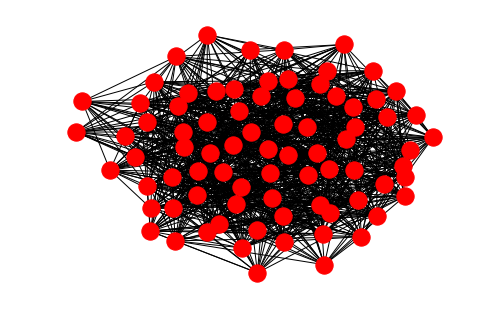

In [17]:
nx.draw(Online.V)
plt.show()

In [18]:
#paramètrage des algorithmes
sigma=0.3
alpha=5
alpha2=1
z=0
method = "random design"

#### Algorithme CLUB

In [19]:
list_m, list_CB, list_omega, list_payoff, list_random_payoff, regret_cum, regret_cum_random, V = Online.CLUB(sigma=sigma,alpha=alpha,alpha2=alpha2,z=z,method=method)

#### Algorithme UCB_IND (pas de cluster)

In [20]:
payoff_UCB_IND, rand_payoff_IND, regret_cum_UCB_IND, regret_cum_rand_UCB_IND, V_IND = Online_UCB_IND.CLUB(sigma=sigma,alpha=alpha,alpha2=alpha2,z=z,method=method)[3:]

#### Algorithme LINUCB_IND 

In [21]:
list_payoff_Lin,regret_cum_Lin = Online.LinUCB_IND(sigma=sigma,alpha=alpha,method=method)

Regardons l'évolution du nombre de Cluster au fur et à mesure des ittérations :

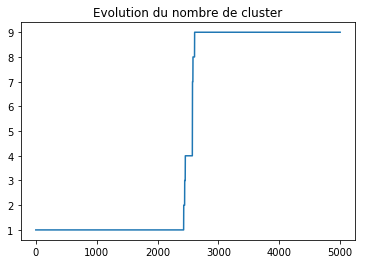

In [22]:
plt.plot(list_m)
plt.title("Evolution du nombre de cluster")
plt.show()

Observons l'évolution des Confidence Bound :

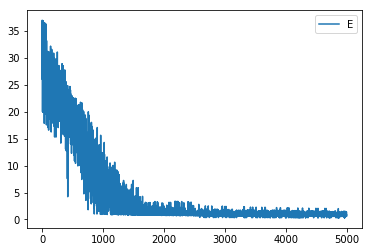

In [23]:
plt.plot(list_CB)
plt.legend("Evolution des Confidence Bound")
plt.show()

Observons l'évolution de la payoff cumulée en fonction des ittérations :

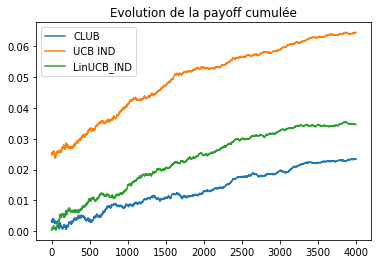

In [28]:
plt.plot(Online.payoff_cum(list_payoff)[1000:Online.T])
plt.plot(Online_UCB_IND.payoff_cum(payoff_UCB_IND)[1000:Online_UCB_IND.T])
plt.plot(Online.payoff_cum(list_payoff_Lin)[1000:Online.T])
plt.title("Evolution de la payoff cumulée")
plt.legend(["CLUB","UCB IND","LinUCB_IND"])
plt.show()

Observons enfin le regret cumulé associé : 

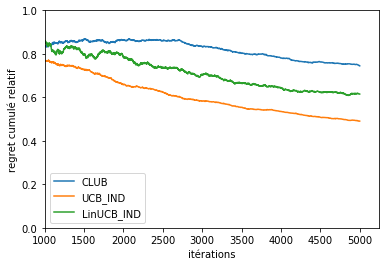

In [29]:
#plt.plot(-regret_cum_random)
plt.plot(regret_cum/regret_cum_random)
plt.plot(regret_cum_UCB_IND/regret_cum_rand_UCB_IND)
plt.plot(regret_cum_Lin/regret_cum_random)
plt.legend(["CLUB","UCB_IND","LinUCB_IND"])
plt.xlim(1000,)
plt.ylim(0,1)
plt.xlabel("itérations")
plt.ylabel("regret cumulé relatif")
plt.show()

Les nouveux clusters sont :

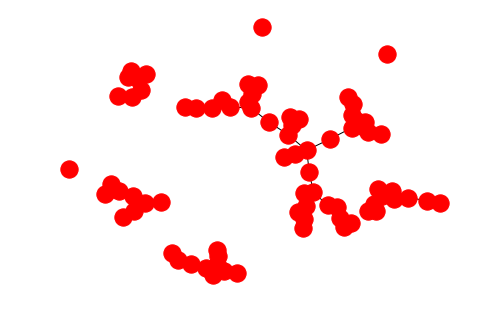

In [26]:
nx.draw(V)
plt.show()